# Results 2 - Gold

* X3 - best model so far
* Stage8 - best model from before
* Baseline - underlying gold asset scaled to portfolio value

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import auc

from tensorflow.keras.models import load_model

from RESULTS_stage8_HELPERS import Helpers as H8
from RESULTS_stage9_HELPERS import Helpers as H9

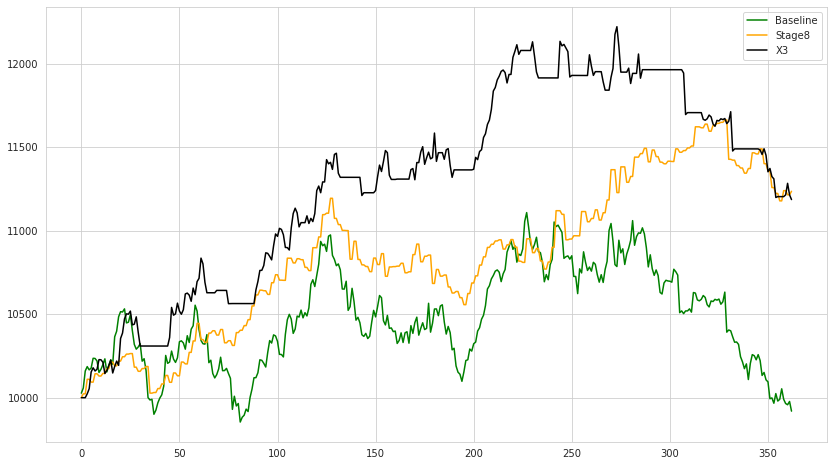

A R E A - U N D E R - C U R V E - S C O R E
Baseline: 3792750
s8: 3928747
s9_x3: 4087427
diff(baseline, s8): 135996
diff(baseline, s9_x3): 294677
diff(s8, s9_x3): 158680


In [6]:
helpers8 = H8()
helpers9 = H9()
# Load models
model1 = load_model('local1_model_3249')
model2 = load_model('model_8465')
# Obtain portfolio values
s8, _, _ = helpers8.get_p_values(model1)
s9_x3, _, _ = helpers9.get_p_values(model2)
# Style
sns.set_style('whitegrid')
data, test, _, df2 = helpers9.get_data()
ticks = [i for i in range(0, 365, 365 // 6)]
dates = [data['date'].iloc[len(data) - 365:].iloc[i] for i in range(0, 365, 365 // 6)]
# Get the Buy and Hold baseleine
BH = []
BH_count = init_cash = 10000
for i in df2['Price'][len(df2) - len(test) + 2: ]:
    BH_count = BH_count * (1 + i)
    BH.append(BH_count)
# One plot to rule them all
plt.figure(figsize=(14, 8))
plt.plot(BH, 'g', label='Baseline')
plt.plot(s8, color='orange', label='Stage8')
plt.plot(s9_x3, 'k', label='X3')
plt.legend(loc='best')
plt.show()
# Area under curve
x = np.arange(len(BH))
print('A R E A - U N D E R - C U R V E - S C O R E')
print('Baseline:', int(auc(x, BH)))
print('s8:', int(auc(x, s8)))
print('s9_x3:', int(auc(x, s9_x3)))
print('diff(baseline, s8):', int(abs(auc(x, BH) - auc(x, s8))))
print('diff(baseline, s9_x3):', int(abs(auc(x, BH) - auc(x, s9_x3))))
print('diff(s8, s9_x3):', int(abs(auc(x, s8) - auc(x, s9_x3))))